In [1]:
%reload_ext lab_black

In [2]:
import pandas as pd
from nltk import tokenize
import datetime
import matplotlib.pylab as plt
import yfinance as yf
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from numba import jit, prange


# Authors: Christopher Oblak,
# Date Intialized: 23FEB2021
# Project: YouTube Content-Based Stock Predictor
# Task: Input, cleaning, and feature building of youtube data that has been continually collected.

# The following code is designed to be ran at the bash terminal with a file name.  It will injest a give data file (in this case a ".gzip" file),
# and resave cleaning date that has additional feautres build into and cleaned caption and titles, and sentiment scores.

In [39]:
# input data
nvidia_df = pd.read_csv("../00_data/nvidia_caption_data.gz")

In [31]:
full_df = pd.read_csv("../00_data/full_search_caption_df_22MAR.gz")

In [34]:
full_df.tail(50)

,Unnamed: 0,searchKeyIndex,videoID,datePub,searchedDate,VideoTitle,channelTitle,viewCount,likeCount,dislikeCount,captionString
41590,200,Tesla,V9mz20l7-Zk,2021-03-22T14:50:17Z,2021-03-22 18:05:09.720813,"Jim Cramer weighs in on Cathie Wood's $3,000 p...",CNBC Television,8553,473,48,i think when i thought of this initially i don...
41591,201,Tesla,6b0r9tezb7E,2021-03-21T20:00:03Z,2021-03-22 18:05:10.220794,Elon Musk JUST Respond to Ark Invest's Tesla P...,Meet Kevin,201856,6596,250,everyone meet kevin here let's talk about tesl...
41592,202,Tesla,XEHfFbbH1SE,2021-03-22T17:00:09Z,2021-03-22 18:05:10.940569,TESLA Model 3 MY 2021 | Veloce e (QUASI) senza...,Automoto.it,1809,196,9,[]
41593,203,Tesla,z-lR7b8dFZQ,2021-03-22T15:11:13Z,2021-03-22 18:05:11.578625,NEW Tesla Model S Leaked,Ryan Shaw,5915,848,5,today we're getting into the latest tesla news...
41594,204,Tesla,rKUR0qi5JIQ,2021-03-21T14:00:14Z,2021-03-22 18:05:12.277163,TESLA VS FOX NEWS VAN COVERAGE OF GANG WITH AU...,Wham Baam Teslacam,111937,5408,107,[Music] stewart was driving his model y in mem...
41595,205,Tesla,LA4ZmzgxKb4,2021-03-22T17:06:44Z,2021-03-22 18:05:12.761164,"ARK's Tesla Price Target Is $3,000 In 2025 🤖🚖",HyperChange,4518,522,6,what up hyper change welcome to another episod...
41596,206,Tesla,DHvkyrey3JE,2021-01-29T03:43:09Z,2021-03-22 18:05:13.382528,2021 Tesla Model S Refresh Reaction!,Marques Brownlee,5423873,210570,6165,[]
41597,207,Tesla,_0Bdw1rrcwQ,2021-03-12T19:36:37Z,2021-03-22 18:05:13.847925,I Finally Got a Tesla and Here's What I Really...,Scotty Kilmer,926011,34742,1134,rev up your engines all right here we go scott...
41598,208,Tesla,RtQ9FklUTWQ,2021-01-26T16:27:57Z,2021-03-22 18:05:14.314983,3 Reasons You Should NOT Buy A Tesla,Shelby Church,270642,8599,1913,[]
41599,209,Tesla,jlOjovQwH7w,2021-02-18T15:03:20Z,2021-03-22 18:05:14.984850,New Tesla Model 2 = Game OVER for Gas,Andy Slye,1535266,20041,1261,Thanks to Private Internet Access for sponsori...


In [43]:
# Cleaning step1: fix the issue were the data was appended incorrectly
correct_df = nvidia_df.iloc[0:16268].copy()
incorrect_df = nvidia_df.iloc[16268:].copy()

# relable incoorect columns to be appended back correctly
incorrect_df.rename(
    columns={
        "captionString": "drop",
        "Unnamed: 0": "Index",
        "Unnamed: 0.1": "videoID",
        "videoID": "datePub",
        "datePub": "searchedDate",
        "searchedDate": "VideoTitle",
        "VideoTitle": "channelTitle",
        "channelTitle": "viewCount",
        "viewCount": "likeCount",
        "likeCount": "dislikeCount",
        "dislikeCount": "captionString",
    },
    inplace=True,
)

# drop the exccess column created by AWS appending
incorrect_df = incorrect_df.drop(columns=["drop"])

# relable columns to match the corrected df
correct_df.rename(columns={"Unnamed: 0.1": "Index"}, inplace=True)
correct_df = correct_df.drop(columns=["Unnamed: 0"])

# create new nvida data frame to begin cleaning and working with
nvidia_df_1 = correct_df.append(incorrect_df, sort=False)

# initialize correct types of data for each column
nvidia_df_1["VideoTitle"] = nvidia_df_1["VideoTitle"].astype("str")
nvidia_df_1["datePub"] = pd.to_datetime(
    nvidia_df_1["datePub"], format="%Y-%m-%d %H:%M:%S", utc=True
)
nvidia_df_1["searchedDate"] = pd.to_datetime(
    nvidia_df_1["searchedDate"], format="%Y-%m-%d %H:%M:%S", utc=True
)
nvidia_df_1["channelTitle"] = nvidia_df_1["channelTitle"].astype("str")
nvidia_df_1["viewCount"] = nvidia_df_1["viewCount"].astype("int")
nvidia_df_1["likeCount"] = nvidia_df_1["likeCount"].astype("int")
nvidia_df_1["dislikeCount"] = nvidia_df_1["dislikeCount"].astype("int")
nvidia_df_1["captionString"] = nvidia_df_1["captionString"].astype("str")

# define a cleaning function to clean and standardize caption strings
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("\\[[^][]*]", "", raw)
    result = re.sub("<[a][^>]*>(.+?)</[a]>", "Link.", result)
    result = re.sub("&gt;", "", result)
    result = re.sub("&#x27;", "'", result)
    result = re.sub("&quot;", '"', result)
    result = re.sub("&#x2F;", " ", result)
    result = re.sub("<p>", " ", result)
    result = re.sub("</i>", "", result)
    result = re.sub("&#62;", "", result)
    result = re.sub("<i>", " ", result)
    result = re.sub("\n", "", result)
    result = re.sub("     ", "", result)
    return result


nvidia_df_1["captionString"] = nvidia_df_1["captionString"].apply(clean)
nvidia_df_1["VideoTitle"] = nvidia_df_1["VideoTitle"].apply(clean)

# for i in range(len(nvidia_df_1["captionString"])):
#    nvidia_df_1["captionString"][i] = clean(nvidia_df_1["captionString"][i])

In [44]:
nvidia_df_2 = nvidia_df_1.copy()
nvidia_df_2["VideoTitle"] = nvidia_df_2["VideoTitle"].apply(clean)

In [7]:
nvidia_df_2.tail()

,Index,videoID,datePub,searchedDate,VideoTitle,channelTitle,viewCount,likeCount,dislikeCount,captionString
20788,20,AG_ZHi3tuyk,2020-09-16 12:59:59+00:00,2021-03-19 18:03:20.670031+00:00,"Nvidia, you PROMISED! - RTX 3080 Review",Linus Tech Tips,3741789,148430,4216,- The RTX 3080 is the most powerful GPU we've ...
20789,21,3dJhDqLjPN0,2021-02-24 21:59:34+00:00,2021-03-19 18:03:21.320922+00:00,NVIDIA (NVDA) Stock Analysis - Q4 Earnings + I...,The Investor Channel,7773,269,1,what is going on investors hopefully guys had ...
20790,22,H1DApIvOCMw,2021-02-26 17:35:37+00:00,2021-03-19 18:03:21.788746+00:00,My SALTY Review of the NVIDIA RTX 3060...,JayzTwoCents,1013948,51773,702,with no parts markup and only a 75 build fee r...
20791,23,Y5J2bgXiK9g,2021-03-09 17:00:10+00:00,2021-03-19 18:03:22.387116+00:00,Should Nvidia Stop Selling 3060s?,LMG Clips,53940,2238,33,uh the you know the 30 80 eth mining wait isn'...
20792,24,HZigkcTxRo0,2021-02-25 03:01:00+00:00,2021-03-19 18:03:22.919039+00:00,Nvidia’s plan ISN’T WORKING,TechLinked,1394144,145393,4053,"- Techlinked number three, four, five. - Yeah..."


In [6]:
nvidia_df_2[nvidia_df_2["channelTitle"] == "JayzTwoCents"].head()

,Index,videoID,datePub,searchedDate,VideoTitle,channelTitle,viewCount,likeCount,dislikeCount,captionString
3,3,nMns8t4OhI0,2020-09-30 23:00:06+00:00,2020-10-02 01:45:23.922084+00:00,NVIDIA Responds to RTX 3080 Crashes...,JayzTwoCents,561238,27766,885,
9,9,zxJDdRgs7Lw,2020-09-10 13:00:28+00:00,2020-10-02 01:45:28.639529+00:00,We finally have our hands on the NVIDIA RTX 3080!,JayzTwoCents,2349784,104987,4459,well today's the day out with the old and and ...
22,8,zxJDdRgs7Lw,2020-09-10 13:00:28+00:00,2020-10-02 17:20:46.083212+00:00,We finally have our hands on the NVIDIA RTX 3080!,JayzTwoCents,2350121,104992,4459,well today's the day out with the old and and ...
46,7,zxJDdRgs7Lw,2020-09-10 13:00:28+00:00,2020-10-02 18:00:14.745652+00:00,We finally have our hands on the NVIDIA RTX 3080!,JayzTwoCents,2350136,104992,4459,well today's the day out with the old and and ...
71,7,zxJDdRgs7Lw,2020-09-10 13:00:28+00:00,2020-10-02 18:03:09.902661+00:00,We finally have our hands on the NVIDIA RTX 3080!,JayzTwoCents,2350136,104992,4459,well today's the day out with the old and and ...


In [7]:
nvidia_df.head(5)

,Unnamed: 0,Unnamed: 0.1,videoID,datePub,searchedDate,VideoTitle,channelTitle,viewCount,likeCount,dislikeCount,captionString
0,0,0,y4fb_R5Ogw0,2020-10-01T05:16:02Z,2020-10-02 01:45:21.553469,"2x NVIDIA RTX 3090 SLI Benchmarks: 500FPS, 700...",Gamers Nexus,367472,15701,260,so this setup that you're seeing is what we ha...
1,1,1,ALEXVtnNEwA,2020-09-01T17:15:57Z,2020-10-02 01:45:22.351801,NVIDIA GeForce Special Event Livestream,IGN,543115,16860,411,b [Music] [Music] [Applause] [Music] [Music] w...
2,2,2,E98hC9e__Xs,2020-09-01T16:42:07Z,2020-10-02 01:45:23.252012,NVIDIA GeForce RTX 30 Series | Official Launch...,NVIDIA GeForce,1484075,54741,1135,Welcome to my kitchen. I hope all of you are...
3,3,3,nMns8t4OhI0,2020-09-30T23:00:06Z,2020-10-02 01:45:23.922084,NVIDIA Responds to RTX 3080 Crashes...,JayzTwoCents,561238,27766,885,[]
4,4,4,AG_ZHi3tuyk,2020-09-16T12:59:59Z,2020-10-02 01:45:24.592244,"Nvidia, you PROMISED! - RTX 3080 Review",Linus Tech Tips,3391565,141852,3961,- The RTX 3080 is the most powerful GPU we've ...


In [8]:
nvidia_df_2.to_csv("../00_data/Cleaned_Data_22MAR.gz", compression="gzip")

### Plot number of video's a day

In [45]:
data_df = pd.to_datetime(
    nvidia_df_2["searchedDate"], format="%Y-%m-%d", utc=True
).dt.date

In [46]:
data_df.value_counts()

2020-10-26    335
2020-11-20    325
2020-10-29    309
2020-10-07    300
2021-02-19    300
             ... 
2020-12-21     25
2020-12-12     25
2021-01-07     25
2020-11-07     25
2020-12-15     25
Name: searchedDate, Length: 118, dtype: int64

In [11]:
type(nvidia_df["searchedDate"][0])

str

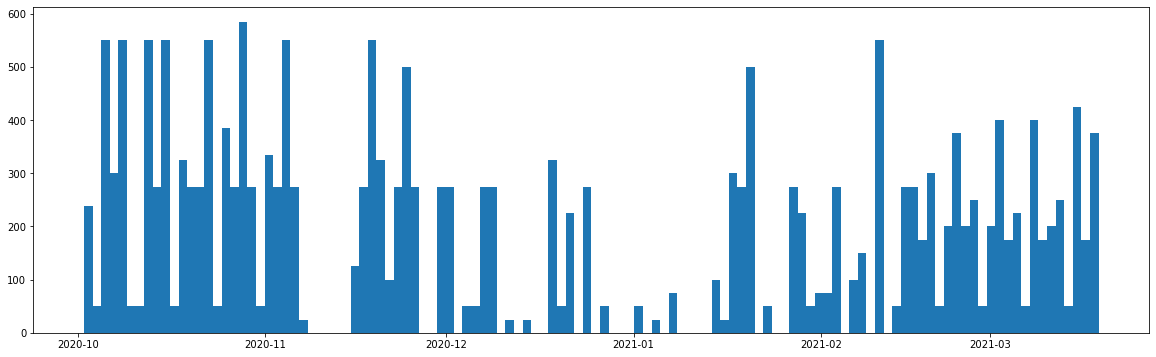

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.hist(
    (pd.to_datetime(nvidia_df_2["searchedDate"], format="%Y-%m-%d", utc=True).dt.date),
    bins=118,
)

plt.show()

## The below code is to be copied to a separate .py file for seamless data cleaning and execution.

In [ ]:
import pandas as pd
from nltk import tokenize
from datetime import datetime
import matplotlib.pylab as plt
import yfinance as yf
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from numba import jit, prange

# define a cleaning function to clean and standardize caption strings
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("\\[[^][]*]", "", raw)
    result = re.sub("<[a][^>]*>(.+?)</[a]>", "Link.", result)
    result = re.sub("&gt;", "", result)
    result = re.sub("&#x27;", "'", result)
    result = re.sub("&quot;", '"', result)
    result = re.sub("&#x2F;", " ", result)
    result = re.sub("<p>", " ", result)
    result = re.sub("</i>", "", result)
    result = re.sub("&#62;", "", result)
    result = re.sub("<i>", " ", result)
    result = re.sub("\n", "", result)
    result = re.sub("     ", "", result)
    return result

def clean_nvidia_df(df):
    # input data
    nvidia_df = pd.read_csv(df)
    
    # Cleaning step1: fix the issue were the data was appended incorrectly
    correct_df = nvidia_df.iloc[0:16268].copy()
    incorrect_df = nvidia_df.iloc[16268:].copy()

    # relable incoorect columns to be appended back correctly
    incorrect_df.rename(
        columns={
            "captionString": "drop",
            "Unnamed: 0": "Index",
            "Unnamed: 0.1": "videoID",
            "videoID": "datePub",
            "datePub": "searchedDate",
            "searchedDate": "VideoTitle",
            "VideoTitle": "channelTitle",
            "channelTitle": "viewCount",
            "viewCount": "likeCount",
            "likeCount": "dislikeCount",
            "dislikeCount": "captionString",
        },
        inplace=True,
    )

    # drop the exccess column created by AWS appending
    incorrect_df = incorrect_df.drop(columns=["drop"])

    #relable columns to match the corrected df
    correct_df.rename(columns={"Unnamed: 0.1": "Index"}, inplace=True)
    correct_df = correct_df.drop(columns=["Unnamed: 0"])

    #create new nvida data frame to begin cleaning and working with
    nvidia_df_1 = correct_df.append(incorrect_df, sort=False)
    
    # initialize correct types of data for each column
    nvidia_df_1["VideoTitle"] = nvidia_df_1["VideoTitle"].astype("str")
    nvidia_df_1["datePub"] = pd.to_datetime(
        nvidia_df_1["datePub"], format="%Y-%m-%d %H:%M:%S", utc=True
    )
    nvidia_df_1["searchedDate"] = pd.to_datetime(
        nvidia_df_1["searchedDate"], format="%Y-%m-%d %H:%M:%S", utc=True
    )
    nvidia_df_1["channelTitle"] = nvidia_df_1["channelTitle"].astype("str")
    nvidia_df_1["viewCount"] = nvidia_df_1["viewCount"].astype("int")
    nvidia_df_1["likeCount"] = nvidia_df_1["likeCount"].astype("int")
    nvidia_df_1["dislikeCount"] = nvidia_df_1["dislikeCount"].astype("int")
    
    nvidia_df_1["captionString"] = nvidia_df_1["captionString"].apply(clean)
    nvidia_df_1["VideoTitle"] = nvidia_df_1["VideoTitle"].apply(clean)
    
    return nvidia_df_1
    
def main(df = "../00_data/nvidia_caption_data_21FEB.gz"):
    cleaned_nvidia_df_prefeatures = clean_nvidia_df(df)
    print(cleaned_nvidia_df_prefeatures.head())

if __name__ == "__main__": 
    import sys
    df = str(sys.argv[1])
    print(df.head())
    main(df)
    print(cleaned_df.head())